**Import Libraries**

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Data Preprocessing

from sklearn.preprocessing import FunctionTransformer # Transforming the data
from sklearn.preprocessing import OneHotEncoder # Data Encoding
from sklearn.preprocessing import StandardScaler # Data Scaling
from sklearn.decomposition import PCA # for reducing the dimensionality
import warnings
warnings.filterwarnings('ignore')

In [7]:
# Models

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [8]:
# Neural Networks

import tensorflow
import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [9]:
# Evaluation Metrics

from sklearn.metrics import accuracy_score # model classification_report

**Data Reading**

In [43]:
df=pd.read_csv('/content/dataset.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [44]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [45]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0
43399,36271,Female,82.0,0,0,Yes,Private,Urban,79.48,20.6,never smoked,0


**Data Exploration**

In [46]:
df.isnull()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,False,False,False,False,False,False,False,False,False,False,False,False
43396,False,False,False,False,False,False,False,False,False,False,False,False
43397,False,False,False,False,False,False,False,False,False,False,False,False
43398,False,False,False,False,False,False,False,False,False,False,False,False


In [47]:
df.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


dataset does have missing values in the "bmi" and "smoking_status" columns as indicated by the non-null count being less than the total number of rows in the dataset (43,400).

In [49]:
df.shape

(43400, 12)

In [50]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [51]:
df.describe() # It gives us the summary of numerical data from the dataset

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [52]:
df.stroke.value_counts(True).rename('%').mul(100) # for getting the % of target variable data

0    98.195853
1     1.804147
Name: %, dtype: float64

As we are able to see there are 98% peoples who don't have stroke problem and only 1% people have problem of stroke which shows our data is highly imbalanced.

In [53]:
 df.stroke.value_counts()

0    42617
1      783
Name: stroke, dtype: int64

It shows us the number of 0's and 1's in target variable

Text(0.5, 1.0, 'Number of Patient')

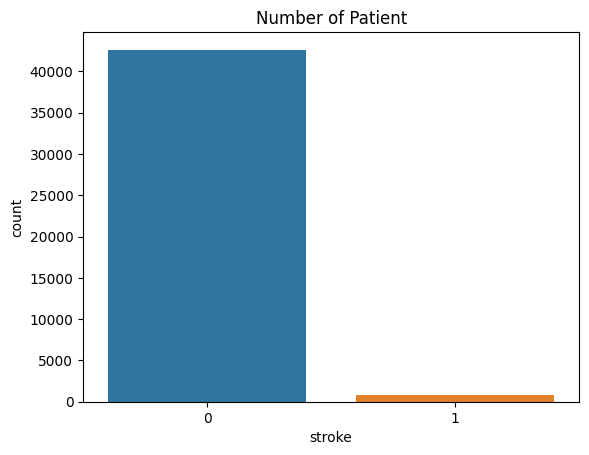

In [54]:
# Show number of patient by stroke

sns.countplot(data=df,x='stroke')
plt.title('Number of Patient')

Now by the help of this countplot we are able to see clearly how imbalance our data is.

**Separating Categorical and numerical data**

In [55]:
cat_features=[feature for feature in df.columns if df[feature].dtypes=='O']
print('Number of categorical variables:',len(cat_features))
print('-----------------------------------')
print("Number of categorical features:",cat_features)

Number of categorical variables: 5
-----------------------------------
Number of categorical features: ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


In [56]:
num_features=[feature for feature in df.columns if df[feature].dtypes!='O']
print('Number of Numerical variables:',len(num_features))
print('-----------------------------------')
print("Number of Numerical features:",num_features)

Number of Numerical variables: 7
-----------------------------------
Number of Numerical features: ['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']


**Checking Duplicate Values**

In [57]:
df.duplicated().sum()

0

It shows that their is no duplicate values is present in our dataset

**Checking Correlation**

[Text(0.5, 1.0, 'Correlation Matrix')]

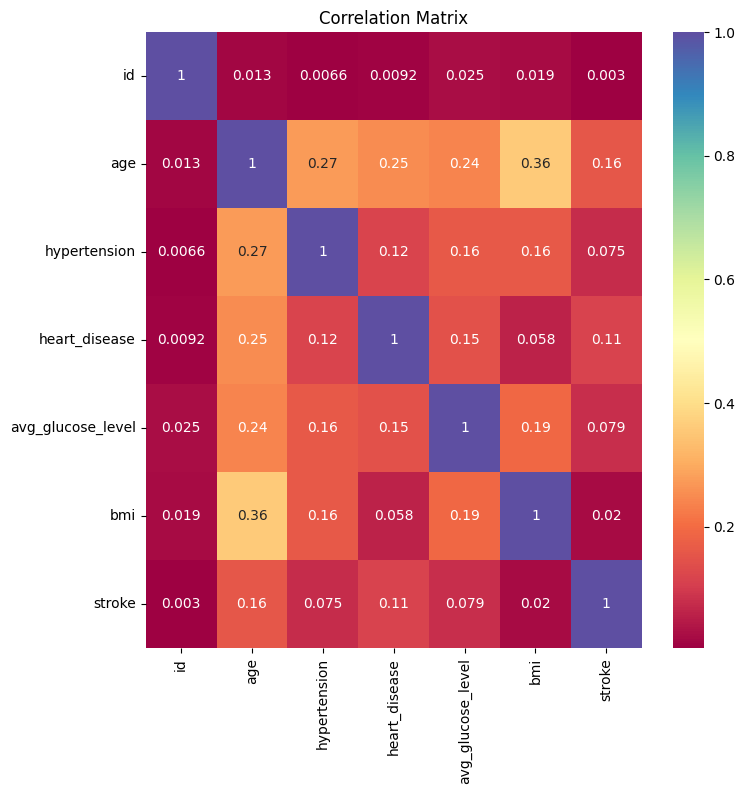

In [58]:
corr=df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(data=corr,annot=True,cmap='Spectral').set(title="Correlation Matrix")

Correlation ranges between -1 to 1. so as we are able to see id column have very less correlation with respect to the target variable so that we can drop it.

**Visualizing Categorical Feature**

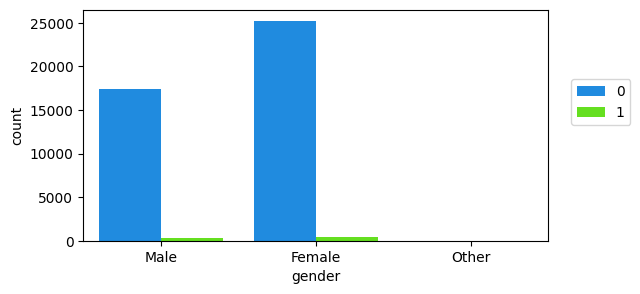

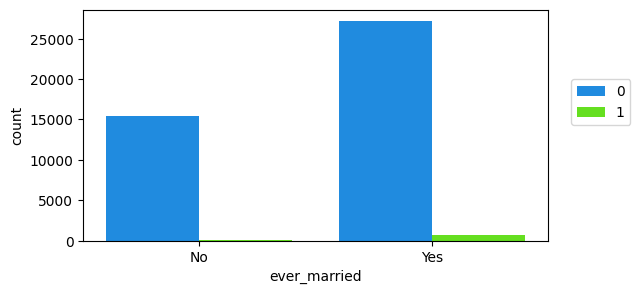

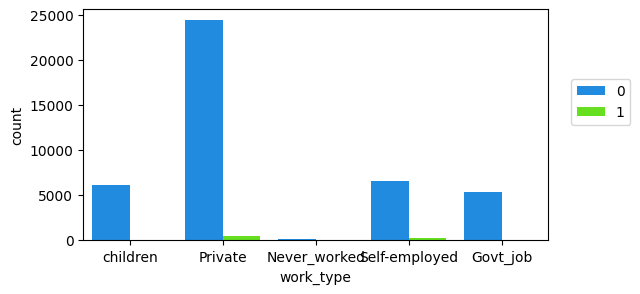

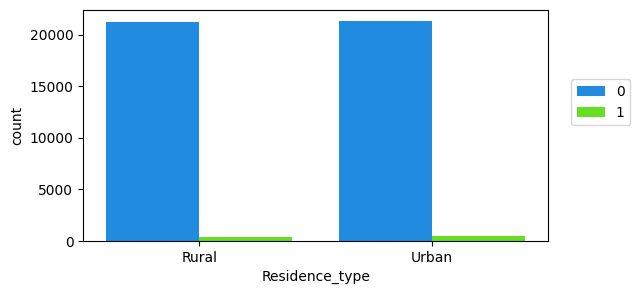

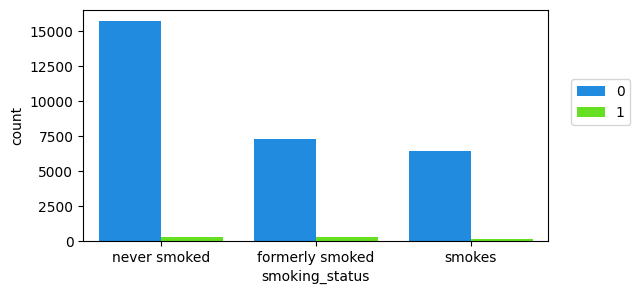

In [59]:
for i in cat_features:
  plt.figure(figsize=(6,3),dpi=100) # dpi stands for depth per inch
  sns.countplot(data=df,x=i,hue='stroke',palette='gist_rainbow_r')
  plt.legend(loc=(1.05,0.5))

**Visualizing Numerical Feature**

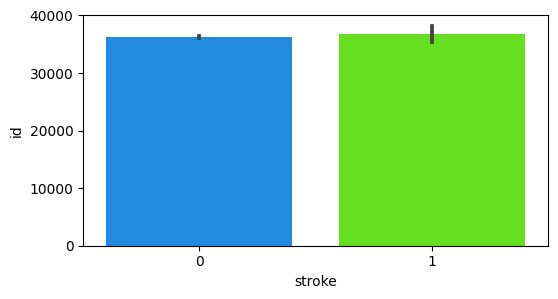

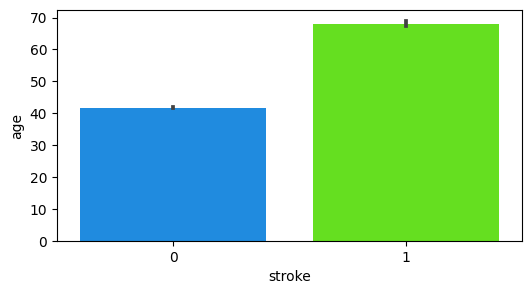

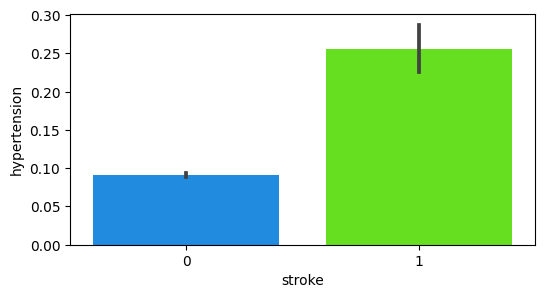

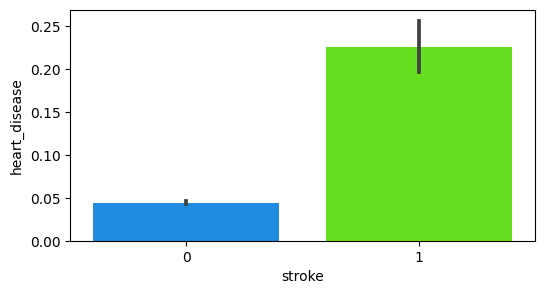

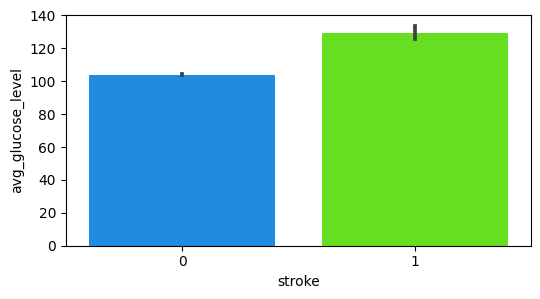

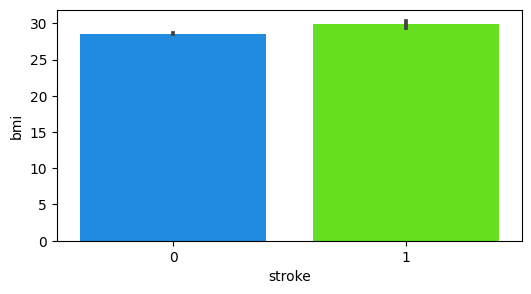

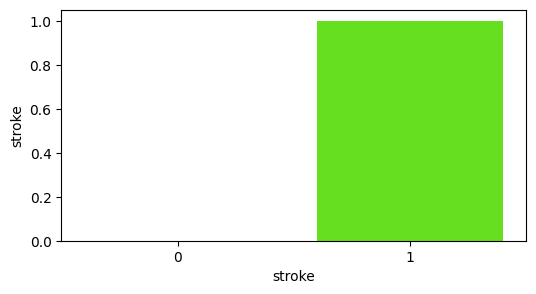

In [60]:
for i in num_features:
  plt.figure(figsize=(6,3),dpi=100) # dpi stands for depth per inch
  sns.barplot(data=df,x='stroke',y=i,palette='gist_rainbow_r')

The above plots shows the impact of the features on our target variable.

**Handling Missing values**

In [61]:
df.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [62]:
df['bmi']=df['bmi'].fillna(df['bmi'].mean())

In [63]:
df.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                      0
smoking_status       13292
stroke                   0
dtype: int64

In [64]:
df['smoking_status'].fillna('Unknown', inplace=True)

In [65]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [66]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,Unknown,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,Unknown,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


Now as we are able to see that there is no missing values in our dataset is present.

**Drop Unnecessary Features**

In [67]:
train=df.drop(['id'],axis=1)
train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,Unknown,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,Unknown,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
43395,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [68]:
train.shape

(43400, 11)

In [69]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             43400 non-null  object 
 1   age                43400 non-null  float64
 2   hypertension       43400 non-null  int64  
 3   heart_disease      43400 non-null  int64  
 4   ever_married       43400 non-null  object 
 5   work_type          43400 non-null  object 
 6   Residence_type     43400 non-null  object 
 7   avg_glucose_level  43400 non-null  float64
 8   bmi                43400 non-null  float64
 9   smoking_status     43400 non-null  object 
 10  stroke             43400 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 3.6+ MB


In [70]:
train.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [71]:
train_data_cat=train.select_dtypes("object") # writing for categorical data

In [72]:
train_data_num=train.select_dtypes("number") # writing for numerical data

In [73]:
train_data_cat.head()

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,No,children,Rural,Unknown
1,Male,Yes,Private,Urban,never smoked
2,Female,No,Private,Urban,Unknown
3,Female,Yes,Private,Rural,formerly smoked
4,Male,No,Never_worked,Rural,Unknown


In [74]:
train_data_num.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,3.0,0,0,95.12,18.0,0
1,58.0,1,0,87.96,39.2,0
2,8.0,0,0,110.89,17.6,0
3,70.0,0,0,69.04,35.9,0
4,14.0,0,0,161.28,19.1,0


**Converting the Categorical data into numerical data**

In [75]:
train_data_cat_encoded=pd.get_dummies(train_data_cat,columns=train_data_cat.columns.to_list())
train_data_cat_encoded.head()

,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,1,0,1,0,0,0,0,0,1,1,0,1,0,0,0
1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
2,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0
3,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0
4,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0


here we succesfully converted our categorical into numerical format because our model will be able to understand only numeric data.

**Merging Numerical and categorical columns**

In [76]:
# Merge both dataframes along the columns (axis=1)
data = pd.concat([train_data_cat_encoded,train_data_num],axis=1,join="outer")
data.head()

,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,...,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,0,1,0,1,0,0,0,0,0,1,...,1,0,0,0,3.0,0,0,95.12,18.0,0
1,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,58.0,1,0,87.96,39.2,0
2,1,0,0,1,0,0,0,1,0,0,...,1,0,0,0,8.0,0,0,110.89,17.6,0
3,1,0,0,0,1,0,0,1,0,0,...,0,1,0,0,70.0,0,0,69.04,35.9,0
4,0,1,0,1,0,0,1,0,0,0,...,1,0,0,0,14.0,0,0,161.28,19.1,0


**Separating Independent and dependent columns**

In [77]:
# Extract the "stroke" column
y = data['stroke']
x = data.drop('stroke',axis=1)

In [80]:
print(x.shape)

(43400, 21)


In [81]:
print(y.shape)

(43400,)


**Feature Scaling**

In [78]:
sc=StandardScaler()
x=sc.fit_transform(x)

In [79]:
x

array([[-1.20297067,  1.20360176, -0.01592233, ..., -0.22334159,
        -0.21717647, -1.38846925],
       [-1.20297067,  1.20360176, -0.01592233, ..., -0.22334159,
        -0.38325839,  1.38714994],
       [ 0.83127546, -0.8308396 , -0.01592233, ..., -0.22334159,
         0.14862128, -1.44083942],
       ...,
       [ 0.83127546, -0.8308396 , -0.01592233, ..., -0.22334159,
        -0.29093911,  0.03861798],
       [-1.20297067,  1.20360176, -0.01592233, ..., -0.22334159,
        -0.12346544,  0.60159734],
       [ 0.83127546, -0.8308396 , -0.01592233, ..., -0.22334159,
        -0.57995877, -1.04806312]])

**Splitting the data into training and testing**

In [83]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.svm import SVC
import pickle

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier,plot_importance
from sklearn.model_selection import GridSearchCV,cross_val_score,StratifiedKFold,learning_curve

In [85]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=7)
X_train.shape,X_test.shape

((30380, 21), (13020, 21))

**Building Classifiers**

In [86]:
accuracy={} # here we created a dictionary of accuracy where I will store all the accuracies

*Logistic Regression*

In [87]:
lr=LogisticRegression(max_iter=200)
lr.fit(X_train,y_train)
y_pred1=lr.predict(X_test)
print(accuracy_score(y_test,y_pred1))
accuracy[str(lr)]=accuracy_score(y_test,y_pred1)*100

0.9827188940092166


*Confusion Matrix*

In [88]:
from sklearn.metrics import confusion_matrix

<Axes: >

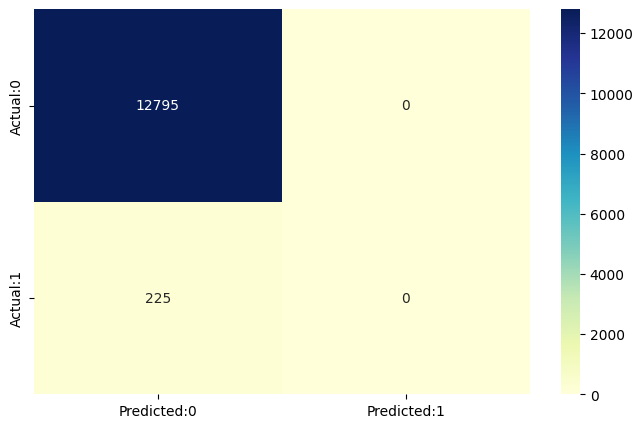

In [90]:
cm=confusion_matrix(y_test,y_pred1)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='YlGnBu')

*Decision Tree Claasifier*

In [92]:
# Create a Decision Tree Classifier
dt = DecisionTreeClassifier()

# Fit the model on the training data
dt.fit(X_train, y_train)

# Make predictions on the test data
y_pred2 = dt.predict(X_test)

# Calculate accuracy and store it in a dictionary
accuracy[str(dt)] = accuracy_score(y_test, y_pred2) * 100

# Print the accuracy
print(accuracy[str(dt)])

96.68970814132103
96.72043010752688


*Random Forest Classifier*

In [93]:
# Create a Random Forest Classifier
rf = RandomForestClassifier()

# Fit the model on the training data
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred3 = rf.predict(X_test)

# Calculate accuracy and store it in a dictionary
accuracy[str(rf)] = accuracy_score(y_test, y_pred3) * 100

# Print the accuracy
print(accuracy[str(rf)])

98.25652841781874


*Gradient Boosting Classifier*

In [94]:
# Create a Gradient Boosting Classifier
gb = GradientBoostingClassifier()

# Fit the model on the training data
gb.fit(X_train, y_train)

# Make predictions on the test data
y_pred4 = gb.predict(X_test)

# Calculate accuracy and store it in a dictionary
accuracy[str(gb)] = accuracy_score(y_test, y_pred4) * 100

# Print the accuracy
print(accuracy[str(gb)])

98.24884792626727


*SVC*

In [95]:
# Create a Support Vector Classifier (SVC)
svc = SVC()

# Fit the model on the training data
svc.fit(X_train, y_train)

# Make predictions on the test data
y_pred5 = svc.predict(X_test)

# Calculate accuracy and store it in a dictionary
accuracy[str(svc)] = accuracy_score(y_test, y_pred5) * 100

# Print the accuracy
print(accuracy[str(svc)])

98.27188940092167


In [96]:
accuracy

{'LogisticRegression(max_iter=200)': 98.27188940092167,
 'DecisionTreeClassifier()': 96.72043010752688,
 'RandomForestClassifier()': 98.25652841781874,
 'GradientBoostingClassifier()': 98.24884792626727,
 'SVC()': 98.27188940092167}

Logistic Regression and SVC seem to be the best-performing models for our classification task based on the provided accuracies.

**Handling Imbalanced Data by using SMOTE**

In [98]:
from imblearn.over_sampling import SMOTE

In [99]:
smote=SMOTE()
x1,y1=smote.fit_resample(x,y)

In [100]:
x1.shape

(85234, 21)

In [101]:
y1.shape

(85234,)

**Splitting the Oversampling data**

In [102]:
X_train,X_test,y_train,y_test=train_test_split(x1,y1,test_size=0.3,random_state=3)

In [103]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(59663, 21)
(25571, 21)
(59663,)
(25571,)


In [104]:
# Logistic Regression

lr=LogisticRegression(max_iter=200)
lr.fit(X_train,y_train)
y_pred1=lr.predict(X_test)
print(accuracy_score(y_test,y_pred1))
accuracy[str(lr)]=accuracy_score(y_test,y_pred1)*100

0.7930077040397325


Now we got the actual accuracy from logistic regression because the accuracy we get before that was noisy because of the imbalanced data,but now it is balanced that's why we get this actual accuracy

<Axes: >

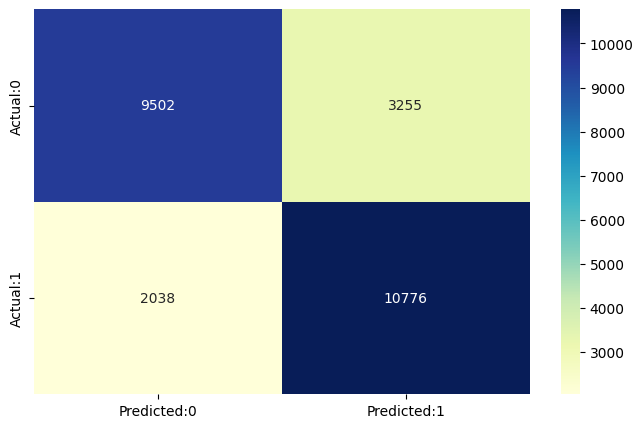

In [105]:
cm=confusion_matrix(y_test,y_pred1)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='YlGnBu')

In [106]:
 print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.82      0.74      0.78     12757
           1       0.77      0.84      0.80     12814

    accuracy                           0.79     25571
   macro avg       0.80      0.79      0.79     25571
weighted avg       0.80      0.79      0.79     25571



In [107]:
y_pred_test=lr.predict(X_test)
test=pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})

In [108]:
test.head()

,Actual,Y test predicted
73400,1,1
55473,1,1
17385,0,0
67026,1,1
81000,1,1


Now as per the output we are able to see our actual and predicted results are same.

In [109]:
 # KNN

 # Create a K-Nearest Neighbors (KNN) classifier with a specified number of neighbors (e.g., n_neighbors=5)
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors as needed

# Fit the model on the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred2 = knn.predict(X_test)

# Calculate accuracy and store it in a dictionary
accuracy[str(knn)] = accuracy_score(y_test, y_pred2) * 100

# Print the accuracy
print(accuracy[str(knn)])

92.83563411677291


<Axes: >

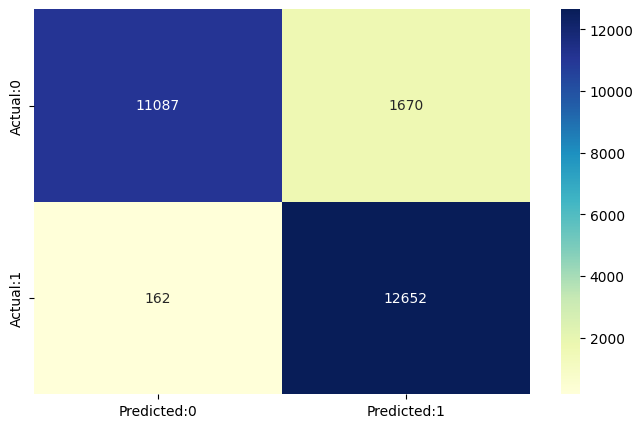

In [110]:
cm=confusion_matrix(y_test,y_pred2)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='YlGnBu')

In [111]:
 print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.99      0.87      0.92     12757
           1       0.88      0.99      0.93     12814

    accuracy                           0.93     25571
   macro avg       0.93      0.93      0.93     25571
weighted avg       0.93      0.93      0.93     25571



In [112]:
y_pred_test=knn.predict(X_test)
test=pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})

In [113]:
test.sample(10)

,Actual,Y test predicted
38895,0,0
8095,0,0
39724,0,0
33147,0,0
8697,0,0
81419,1,1
39938,0,0
41450,0,0
78990,1,1
19007,0,0


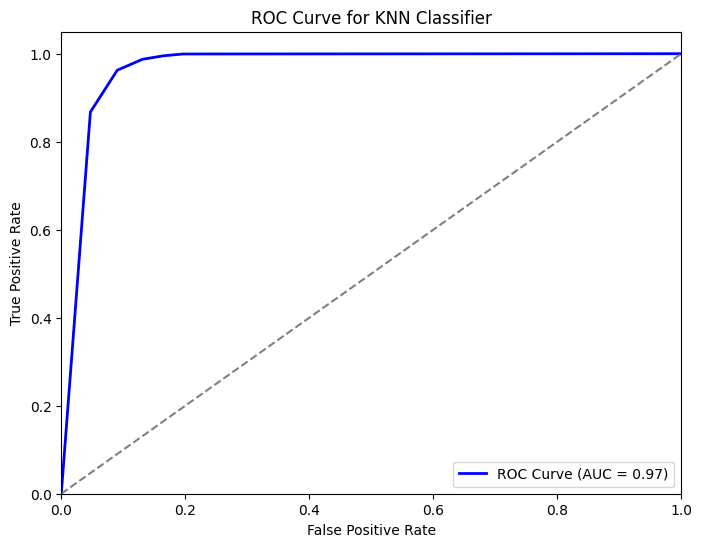

In [114]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate the probabilities for the positive class
y_prob_knn = knn.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_knn)

# Calculate the AUC (Area Under the Curve)
auc = roc_auc_score(y_test, y_prob_knn)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN Classifier')
plt.legend(loc='lower right')
plt.show()


So as we are were getting very good accurate results from knn and this auc-roc graph also shows that 97% of data we are covering under the curve.so that will go ahead with knn for now.